In [2]:
# load dataset
import pandas as pd
import numpy as np
def make_dataset():
    df = pd.read_csv("../data/adult.csv")
    df[df == "?"] = np.nan
    for col in ["workclass", "occupation", "native.country"]:
        df.fillna(df[col].mode(0)[0], inplace=True)
    X = df.drop(["income"], axis=1)
    y = df["income"]
    return X, y




from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
def my_train_test_split():
    X, y = make_dataset()
    # y[y == "<=50K"] = 0
    # y[y == ">50K"] = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
    for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.fit_transform(X_test[feature])

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)

    return X_train, X_test, y_train, y_test

### K-近邻

In [3]:
X_train, X_test, y_train, y_test = my_train_test_split()
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.429109,-0.090519,0.961944,0.183680,-0.420040,-0.399781,-1.023069,-0.898708,0.394740,0.703666,-0.146469,-0.217215,-0.046384,0.281670
1,1.723529,-0.090519,-0.761973,1.215014,-0.032023,1.592598,1.265255,1.585101,0.394740,-1.421129,-0.146469,3.782536,-0.611341,0.281670
2,-0.411015,-0.090519,-0.499149,-0.331987,1.132030,-0.399781,-0.107740,-0.898708,-0.779485,0.703666,-0.146469,-0.217215,-0.046384,-4.887264
3,-1.073459,-0.090519,-0.682968,-0.847654,0.744013,0.928472,1.265255,0.964149,0.394740,0.703666,-0.146469,-0.217215,-1.660545,0.281670
4,2.091553,1.708176,2.301181,0.183680,-0.420040,-0.399781,-1.480734,2.206053,0.394740,-1.421129,-0.146469,-0.217215,-3.113290,0.281670


In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
clf.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.82


In [8]:
# 不同的邻居个数
train_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    print(n_neighbors, end=" | ")


1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 

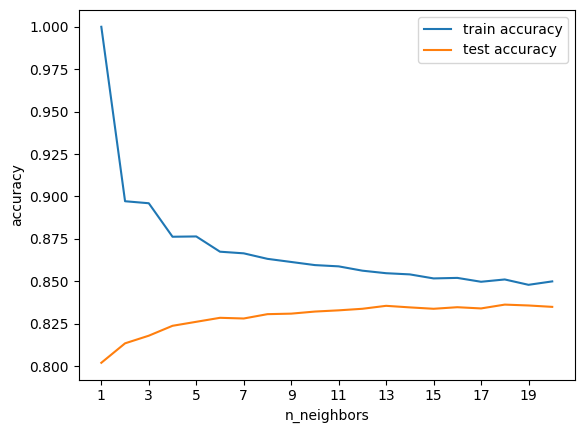

In [12]:
from matplotlib import pyplot as plt
plt.plot(neighbors_settings, train_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(neighbors_settings[::2])
plt.legend()

LogisticRegression & LinearSVC

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.824
Test set score: 0.827


In [39]:
logreg1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.824
Test set score: 0.827


In [38]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.823
Test set score: 0.826


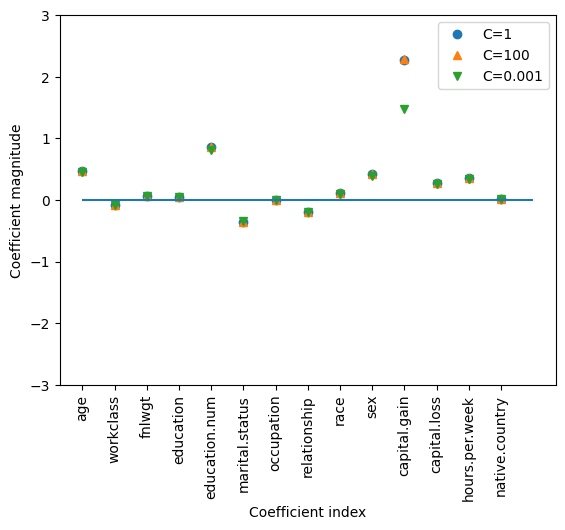

In [44]:
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.hlines(0, 0, len(feature_names))
plt.ylim(-3, 3)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [50]:
logreg1 = LinearSVC(C=1, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.824
Test set score: 0.827


朴素贝叶斯

In [53]:
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(bayes.score(X_train, y_train)))
print("Test set score: {:.3f}".format(bayes.score(X_test, y_test)))

Training set score: 0.802
Test set score: 0.803


决策树

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.813


In [62]:
model = DecisionTreeClassifier(random_state=2, max_depth=5).fit(X_train, y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 0.854
Test set score: 0.852


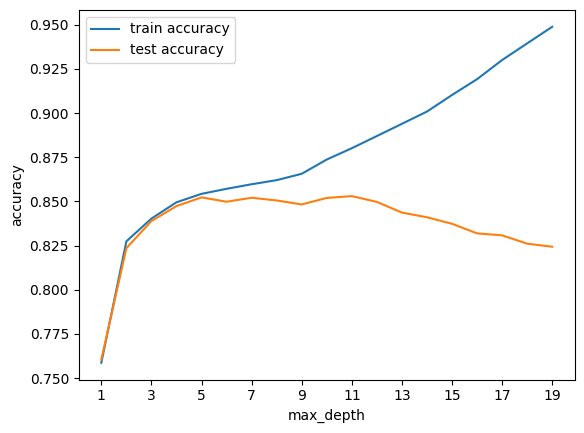

In [75]:
setting = range(1, 20)
train_acc, test_acc = [], []
for max_depth in setting:
    model = DecisionTreeClassifier(random_state=2, max_depth=max_depth).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(setting, train_acc, label="train accuracy")
plt.plot(setting, test_acc, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xticks(setting[::2])
plt.legend()

In [81]:
# 树的特征的重要性
model = DecisionTreeClassifier(random_state=2, max_depth=max_depth).fit(X_train, y_train)
model.feature_importances_

array([0.09932387, 0.02933887, 0.14034637, 0.01186197, 0.14312098,
       0.00528213, 0.0511547 , 0.24430996, 0.00835173, 0.00365624,
       0.13560967, 0.04669455, 0.06902892, 0.01192004])

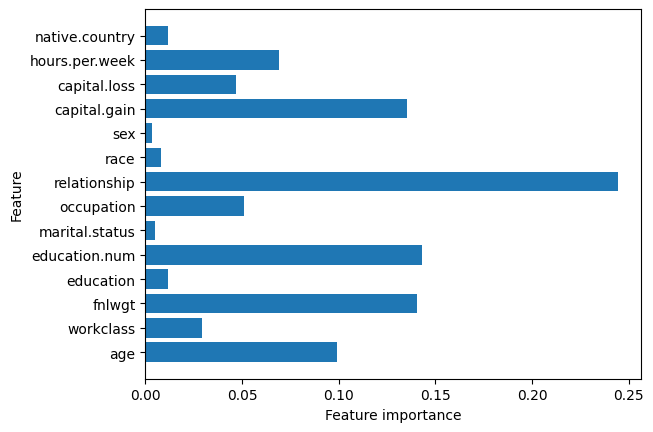

In [82]:
def plot_feature_importances_cancer(model):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(model)

随机森林

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_features=8, max_depth=5, random_state=0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.85530
Test set score: 0.85331


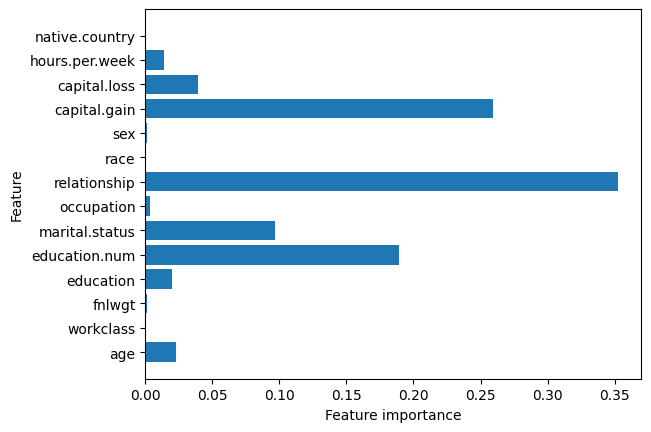

In [95]:
plot_feature_importances_cancer(model)

梯度提升

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.87772
Test set score: 0.86406


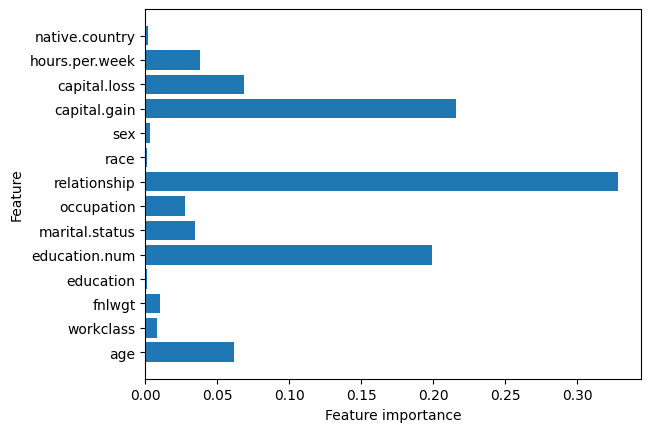

In [106]:
plot_feature_importances_cancer(model)

In [112]:
from sklearn.svm import SVC
model = SVC().fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.85732
Test set score: 0.84901


In [14]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000, alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.5f}".format(model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(model.score(X_test, y_test)))

Training set score: 0.85925
Test set score: 0.85321


NameError: name 'feature_names' is not defined

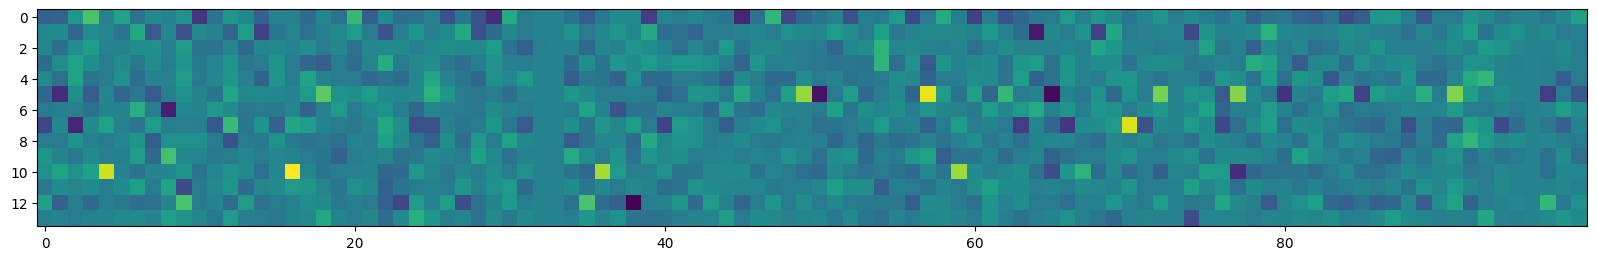

In [15]:
plt.figure(figsize=(20, 5))
plt.imshow(model.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [16]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred=model.predict(y_test))
confusion

p:\CS311-AI\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: '<=50K'